In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
#Load Informer ouput arrays
filepath = '/content/drive/MyDrive/Colab Notebooks/Data/InformerData/GF_Heat_informer.csv'
scaledata = pd.read_csv(filepath)
scaledata.head()

#The informer model training uses the authors original code found at https://github.com/zhouhaoyi/Informer2020

,date,reading
0,2018-05-08 11:00:00,0.0
1,2018-05-08 12:00:00,0.0
2,2018-05-08 13:00:00,0.0
3,2018-05-08 14:00:00,1.0
4,2018-05-08 15:00:00,0.0


In [ ]:
#Rescaling the data so its back in original form
to_scale = scaledata.reading.to_numpy()
to_scale = to_scale.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(to_scale[-2192:]) #The number for 'to_scale' needs to be the test size as specified by the Informer code

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#Implementing Transform and finding MAE
preds = np.load('/content/drive/MyDrive/Colab Notebooks/Data/Informer Results/GF_heat_preds.npy')
trues = np.load('/content/drive/MyDrive/Colab Notebooks/Data/Informer Results/GF_heat_trues.npy')
invpreds = scaler.inverse_transform(preds)
invtrues = scaler.inverse_transform(trues)
MAE = mean_absolute_error(invtrues[0,:,-1], invpreds[0,:,-1])
MAE

0.34963027

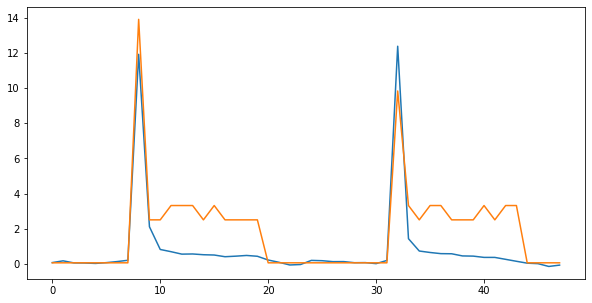

In [ ]:
#Visualisations
plt.figure(figsize=(10,5))
plt.plot(invpreds[100,:,-1])
plt.plot(invtrues[100,:,-1])